# Rule based Sentiment Analysis
using TextBlob, VADER, SentiWordNet

### Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

Importing dataset

In [1]:
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('datasets\\webreviews.txt', sep='\t')
data.head()

,Unnamed: 0,review
0,1,Omg they have the best gluten free pizza ever!...
1,2,Just another good experience with the Domino's...
2,3,"Review for Dominos del Amo bl, Lakewood CA. Ve..."
3,4,I called because my food was cold and not done...
4,5,"OMG, hands down the best pizza I've had from D..."


Dropping unwanted columns

In [2]:
# Dropping Unnamed: 0 column
mydata = data.drop('Unnamed: 0', axis=1)
mydata.head()

# mydata = pd.DataFrame(data.review)

,review
0,Omg they have the best gluten free pizza ever!...
1,Just another good experience with the Domino's...
2,"Review for Dominos del Amo bl, Lakewood CA. Ve..."
3,I called because my food was cold and not done...
4,"OMG, hands down the best pizza I've had from D..."


### Step 1: Cleaning the text

In [3]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['review'].apply(clean)
mydata.head()

,review,Cleaned Reviews
0,Omg they have the best gluten free pizza ever!...,Omg they have the best gluten free pizza ever ...
1,Just another good experience with the Domino's...,Just another good experience with the Domino s...
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...
3,I called because my food was cold and not done...,I called because my food was cold and not done...
4,"OMG, hands down the best pizza I've had from D...",OMG hands down the best pizza I ve had from Do...


### Steps 2-4: Tokenization, POS tagging, stopwords removal

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajkumar.mo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajkumar.mo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajkumar.mo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,Cleaned Reviews,POS tagged
0,Omg they have the best gluten free pizza ever!...,Omg they have the best gluten free pizza ever ...,"[(Omg, None), (best, a), (gluten, a), (free, a..."
1,Just another good experience with the Domino's...,Just another good experience with the Domino s...,"[(another, None), (good, a), (experience, n), ..."
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...,"[(Review, n), (Dominos, n), (del, None), (Amo,..."
3,I called because my food was cold and not done...,I called because my food was cold and not done...,"[(called, v), (food, n), (cold, a), (done, v),..."
4,"OMG, hands down the best pizza I've had from D...",OMG hands down the best pizza I ve had from Do...,"[(OMG, n), (hands, v), (best, a), (pizza, n), ..."


### Step 5: Obtaining the stem words

#### Lemmatization

In [5]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,review,Cleaned Reviews,POS tagged,Lemma
0,Omg they have the best gluten free pizza ever!...,Omg they have the best gluten free pizza ever ...,"[(Omg, None), (best, a), (gluten, a), (free, a...",Omg best gluten free pizza ever love us glut...
1,Just another good experience with the Domino's...,Just another good experience with the Domino s...,"[(another, None), (good, a), (experience, n), ...",another good experience Domino Pizza store K...
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...,"[(Review, n), (Dominos, n), (del, None), (Amo,...",Review Dominos del Amo bl Lakewood CA highly...
3,I called because my food was cold and not done...,I called because my food was cold and not done...,"[(called, v), (food, n), (cold, a), (done, v),...",call food cold do right miss item call answe...
4,"OMG, hands down the best pizza I've had from D...",OMG hands down the best pizza I ve had from Do...,"[(OMG, n), (hands, v), (best, a), (pizza, n), ...",OMG hand best pizza Domino pizza Southaven M...


In [6]:
mydata[['review', 'Lemma']]

,review,Lemma
0,Omg they have the best gluten free pizza ever!...,Omg best gluten free pizza ever love us glut...
1,Just another good experience with the Domino's...,another good experience Domino Pizza store K...
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...
3,I called because my food was cold and not done...,call food cold do right miss item call answe...
4,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...
...,...,...
125,S. P road Gaya Domino's denied to provide ever...,P road Gaya Domino deny provide every day va...
126,I ordered a 12inch pizza and a pasta bowl. I f...,order inch pizza pasta bowl find long black ...
127,I place the order at Domino's at 1801 Valley V...,place order Domino Valley View Drive p Satur...
128,After an hour passed and refused cold uncooked...,hour pass refuse cold uncooked way pizza man...


# Sentiment analysis using TextBlob

In [7]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
fin_data = pd.DataFrame(mydata[['review', 'Lemma']])

In [9]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis
0,Omg they have the best gluten free pizza ever!...,Omg best gluten free pizza ever love us glut...,0.470455,Positive
1,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive
3,I called because my food was cold and not done...,call food cold do right miss item call answe...,0.217143,Positive
4,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...,0.538889,Positive


In [10]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    67
Negative    56
Neutral      7
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x214823cabe0>,
 [Text(-0.05314471431285273, 1.0987154496686597, 'Positive'),
  Text(-0.1325903404163538, -1.0919797624627827, 'Negative'),
  Text(1.3307302142093458, -0.22728197682691248, 'Neutral')],
 [Text(-0.02898802598882876, 0.5992993361829053, '51.5%'),
  Text(-0.0723220038634657, -0.5956253249796997, '43.1%'),
  Text(0.837867171909588, -0.14310346689101897, '5.4%')])

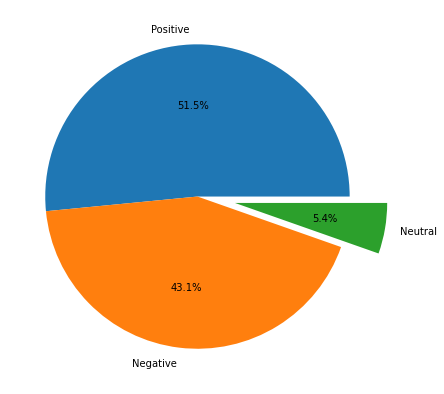

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment analysis using VADER

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [13]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Omg they have the best gluten free pizza ever!...,Omg best gluten free pizza ever love us glut...,0.470455,Positive,0.9872,Positive
1,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive,0.9371,Positive
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive,0.9897,Positive
3,I called because my food was cold and not done...,call food cold do right miss item call answe...,0.217143,Positive,0.7579,Positive
4,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...,0.538889,Positive,0.9312,Positive


In [14]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     58
Positive    47
Negative    25
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x21482449fd0>,
 [Text(0.20202843768969508, 1.1828712991550099, 'Neutral'),
  Text(-0.7683624654911808, -0.787158892234798, 'Positive'),
  Text(0.9052823042371465, -0.6248711464254711, 'Negative')],
 [Text(0.11784992198565546, 0.6900082578404224, '44.6%'),
  Text(-0.41910679935882583, -0.4293593957644352, '36.2%'),
  Text(0.49379034776571623, -0.34083880714116604, '19.2%')])

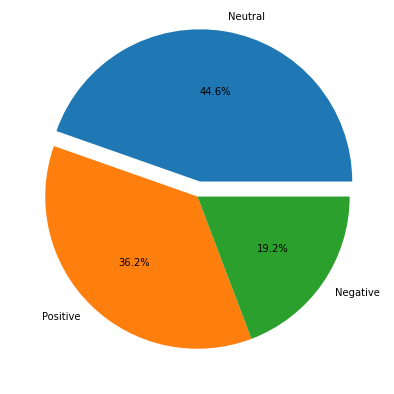

In [15]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment Analysis using SentiWordNet

In [16]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\rajkumar.mo\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Omg they have the best gluten free pizza ever!...,Omg best gluten free pizza ever love us glut...,0.470455,Positive,0.9872,Positive,Positive
1,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive,0.9371,Positive,Positive
2,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive,0.9897,Positive,Positive
3,I called because my food was cold and not done...,call food cold do right miss item call answe...,0.217143,Positive,0.7579,Positive,Positive
4,"OMG, hands down the best pizza I've had from D...",OMG hand best pizza Domino pizza Southaven M...,0.538889,Positive,0.9312,Positive,Positive


In [17]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Negative    70
Positive    54
Neutral      6
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x21486929b00>,
 [Text(-0.14464411925986564, 1.191250636416845, 'Negative'),
  Text(-0.026579912257032004, -1.0996788205037, 'Positive'),
  Text(1.0884570723915454, -0.1589377285631899, 'Neutral')],
 [Text(-0.08437573623492162, 0.6948962045764928, '53.8%'),
  Text(-0.01449813395838109, -0.5998248111838362, '41.5%'),
  Text(0.5937038576681156, -0.08669330648901266, '4.6%')])

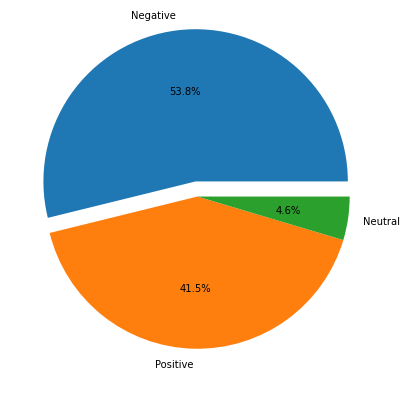

In [18]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x21486a11da0>,
 [Text(-0.13259044265487685, 1.0919797500487745, 'Negative'),
  Text(-0.026579912257032004, -1.0996788205037, 'Positive'),
  Text(1.3358336797532604, -0.1950599396002785, 'Neutral')],
 [Text(-0.07232205962993281, 0.5956253182084223, '53.8%'),
  Text(-0.01449813395838109, -0.5998248111838362, '41.5%'),
  Text(0.8410804650298305, -0.12281551752610127, '4.6%')])

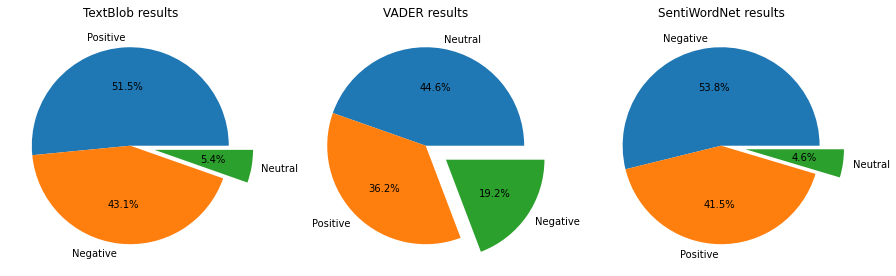

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)